In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Titanic-Dataset.csv")


In [ ]:
# Show the count of missing data
missing_data = df.isnull().sum()

# Calculate the percentage of missing data
missing_percentage = (missing_data / len(df)) * 100

print(missing_data)
print(missing_percentage)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In datasets, certain values might be missing or unavailable. To identify which columns contain missing data and how much of it exists, we can use various techniques.

In [ ]:
#Methods for imputing missing data
# Method 1:
df_dropna = df.dropna ()
#Method 2:
df_median_fill = df.copy()
df_median_fill['Age']. fillna(df_median_fill['Age']. median (),
inplace=True)
#Method 3:
df_mode_fill = df.copy()
df_mode_fill['Embarked']. fillna(df_mode_fill['Embarked'].
mode()[0], inplace=True)

<ipython-input-5-384707724a2a>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_median_fill['Age']. fillna(df_median_fill['Age']. median (),
<ipython-input-5-384707724a2a>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In this code, three methods for handling missing data in a DataFrame are demonstrated. First, **Method 1** uses `dropna()` to remove any rows that contain missing values, creating a new DataFrame `df_dropna` with only complete rows. In **Method 2**, a copy of the original DataFrame is made, and missing values in the `'Age'` column are replaced with the median value of that column using the `fillna()` method, resulting in the `df_median_fill` DataFrame. Finally, **Method 3** creates another copy of the original DataFrame, and missing values in the `'Embarked'` column are filled with the most frequent value (mode) of that column, modifying the `df_mode_fill` DataFrame. Each method modifies the copied DataFrame without altering the original DataFrame.

In [ ]:
# Drop unnecessary or mostly empty columns
df_cleaned = df.drop(columns =['PassengerId', 'Cabin', 'Name', 'Ticket'])

Certain columns in the dataset are either irrelevant for prediction or have a significant number of missing values. In these situations, it is logical to remove those columns. The 'Cabin' column, for example, has many missing values and is not useful for the model. Similarly, columns like 'Name', 'Ticket', and 'PassengerId' serve as unique identifiers and do not contribute meaningful patterns for predicting survival. These columns are therefore dropped from the dataset to streamline the analysis and enhance model performance.

***Feature Types and Preprocessing***
  
In the Titanic dataset, features can be categorized into two main types: numerical and categorical (string/object).  

- **Numerical features**: These include columns like Age, Fare, SibSp, and Parch, which contain either continuous or discrete values and support mathematical operations such as calculating the mean or standard deviation.  
- **Categorical features**: These include columns such as Sex, Embarked, and Pclass, which represent different categories or labels. While Pclass is stored as an integer, it is still considered a categorical feature. Categorical features are generally stored as string or object types in pandas.  

Understanding this distinction is crucial for preprocessing. Categorical data must be converted into numerical form before being used in machine learning models. This conversion is typically done using:  

- **Label encoding**: This method assigns a unique integer to each category, making it suitable for binary or ordinal categories.  
- **One-hot encoding**: This technique creates a separate binary column for each category and is preferred when the categories do not have an ordinal relationship.  

To prepare the data for modeling, several preprocessing steps are required:  
- Encoding categorical features using one-hot or label encoding  
- Handling missing values, such as imputing missing values in the Age or Embarked columns  
- Feature scaling (normalization or standardization) for numerical features like Age and Fare, especially when using models such as logistic regression  

Normalization scales features to a range between [0, 1], while standardization transforms features to have a mean of 0 and a standard deviation of 1:  

 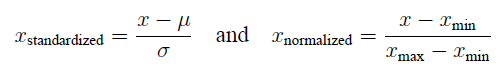

These scaling techniques help models converge more quickly and improve their performance. For this project, since logistic regression is being used, it is essential to apply the appropriate encoding and feature scaling methods.

In [ ]:
from sklearn.preprocessing import LabelEncoder ,StandardScaler

# Load the dataset
df_final = pd.read_csv('Titanic-Dataset.csv')

# Drop columns that are not useful for modeling
df_final = df_final.drop(columns =['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Handle missing values
df_final['Age'] = df_final['Age']. fillna(df_final['Age'].
median ())
df_final['Embarked'] = df_final['Embarked']. fillna(df_final[
'Embarked'].mode ()[0])
# Encode 'Sex' using LabelEncoder
le = LabelEncoder ()
df_final['Sex'] = le.fit_transform(df_final['Sex'])

# One -hot encode 'Embarked '
df_final = pd.get_dummies(df_final , columns =['Embarked'],
drop_first=True)
# Standardize numerical features
scaler = StandardScaler ()
df_final [['Age', 'Fare']] = scaler.fit_transform(df_final [['Age', 'Fare']])

print(df_final.head())


   Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked_Q  \
0         0       3    1 -0.565736      1      0 -0.502445       False   
1         1       1    0  0.663861      1      0  0.786845       False   
2         1       3    0 -0.258337      0      0 -0.488854       False   
3         1       1    0  0.433312      1      0  0.420730       False   
4         0       3    1  0.433312      0      0 -0.486337       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  
